In [793]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [794]:
import sys
sys.path.insert(0, '..//')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from e2slib.utillib import dummy_data, functions
from src.data import data_preparation, manipulations, viz_schema
from e2slib.structures import enums, datetime_schema
from datetime import datetime

In [795]:
demand = dummy_data.create_dummy_site_demand(2022)
carbon = dummy_data.generate_dummy_carbon_profile(2022)
price = dummy_data.generate_dummy_price_profile(2022)

In [796]:
functions.add_time_features(demand)

,Site energy [kWh],Hour,Day of week,Day of year,Month,Year,Weekday flag,Half-hour,Date,Week,season,season_number
2022-01-01 00:00:00+00:00,2,0,5,1,1,2022,weekend,0,2022-01-01,52,WINTER,1
2022-01-01 00:30:00+00:00,2,0,5,1,1,2022,weekend,1,2022-01-01,52,WINTER,1
2022-01-01 01:00:00+00:00,8,1,5,1,1,2022,weekend,2,2022-01-01,52,WINTER,1
2022-01-01 01:30:00+00:00,1,1,5,1,1,2022,weekend,3,2022-01-01,52,WINTER,1
2022-01-01 02:00:00+00:00,10,2,5,1,1,2022,weekend,4,2022-01-01,52,WINTER,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 21:30:00+00:00,9,21,5,365,12,2022,weekend,43,2022-12-31,52,WINTER,1
2022-12-31 22:00:00+00:00,2,22,5,365,12,2022,weekend,44,2022-12-31,52,WINTER,1
2022-12-31 22:30:00+00:00,10,22,5,365,12,2022,weekend,45,2022-12-31,52,WINTER,1
2022-12-31 23:00:00+00:00,0,23,5,365,12,2022,weekend,46,2022-12-31,52,WINTER,1


In [797]:
cols = [
        datetime_schema.DateTimeSchema.DAYOFWEEK,
        datetime_schema.DateTimeSchema.HALFHOUR
    ]

In [798]:
demand.columns[0]

'Site energy [kWh]'

In [799]:
data_preparation.describe_data(demand)

,Site energy [kWh]
count,17520.000000
mean,11.833676
std,11.128800
min,0.000000
25%,4.000000
50%,8.000000
75%,18.000000
max,40.000000


In [800]:
df = manipulations.create_seasonal_average_week(enums.Season.SUMMER, demand)
df

,Site energy [kWh]
0.000000,4.769231
0.020833,4.153846
0.041667,4.846154
0.062500,5.153846
0.083333,4.692308
...,...
6.895833,4.923077
6.916667,4.384615
6.937500,4.769231
6.958333,5.538462


In [801]:
import plotly.express as px

# df = px.data.gapminder().query("country=='Canada'")


fig = px.line(df, x=df.index, y="Site energy [kWh]", title='Site demand for a week')
fig.show()


In [802]:
data = {'A': [10, 15, 12, 14, 20, 8, 11, 13, 16, 5, 1000, 10, 15, 12, 14, 20, 8, 11, 13, 16, 5, 1000, 10, 15, 12, 14, 20, 8, 11, 13, 16, 5, 1000],
        'B': [50, 55, 52, 54, 60, 48, 51, 53, 56, 45, 2000, 50, 55, 52, 54, 60, 48, 51, 53, 56, 45, 2000, 50, 55, 52, 54, 60, 48, 51, 53, 56, 45, 2000],
        'C': [100, 150, 120, 140, 200, 80, 110, 130, 160, 50, 300, 100, 150, 120, 140, 200, 80, 110, 130, 160, 50, 300, 100, 150, 120, 140, 200, 80, 110, 130, 160, 50, 300]}

df = pd.DataFrame(data)

# Add outliers
df.loc[3, 'A'] = 500
df.loc[6, 'B'] = 3000
df.loc[9, 'C'] = 5000

df = np.array(demand)

In [803]:
# df = demand

In [804]:
# print(df)
outlier_remover = data_preparation.OutlierRemover(df)
outliers_removed_df = outlier_remover.data_cleaner()

print("\nDataFrame with outliers removed:")
print(outliers_removed_df)


DataFrame with outliers removed:
[[ 2.]
 [ 2.]
 [ 8.]
 ...
 [10.]
 [ 0.]
 [ 0.]]


In [805]:
fillMissing = data_preparation.FillMissingData(outliers_removed_df)
filled_na_df = fillMissing.data_cleaner(func='fillna')
filled_na_df

array([[ 2.],
       [ 2.],
       [ 8.],
       ...,
       [10.],
       [ 0.],
       [ 0.]])

In [806]:
data_preparation.describe_data(filled_na_df)

,0
count,17520.000000
mean,11.515008
std,10.717928
min,0.000000
25%,4.000000
50%,8.000000
75%,17.000000
max,39.000000


In [807]:
addDatetime = data_preparation.GenerateDatetime(filled_na_df)
filled_na_df = addDatetime.data_cleaner(start_date=datetime(2022,1,1), freq='30T')

In [808]:
filled_na_df[0]

array([1.6409952e+18, 2.0000000e+00])

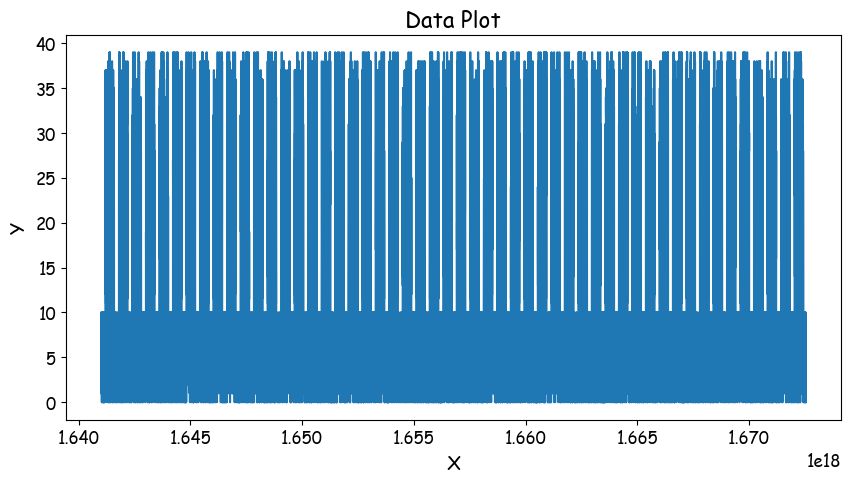

In [811]:
from src.visualization import visualize

test_plot = visualize.Visualizer(filled_na_df, timeseries=True, x=filled_na_df[:,0], y1=filled_na_df[:,1]).plot_plt()

In [ ]:
manipulations.ResampleManipulator(filled_na_df).data_formatter('M', 'sum')

array([[16909.67665743],
       [15510.65806191],
       [17593.65806191],
       [16219.13016863],
       [17183.18595519],
       [16932.60227535],
       [16810.18595519],
       [17545.63946639],
       [16581.14876415],
       [16380.63946639],
       [16794.67665743],
       [17181.69525295]])

In [ ]:
added_time_features = manipulations.AddTimeFeatureManipulator(filled_na_df).data_formatter()
added_time_features

array([[Timestamp('2022-01-01 00:00:00'), 8.0, 0, ..., 52, 'WINTER', 1],
       [Timestamp('2022-01-01 00:30:00'), 4.0, 0, ..., 52, 'WINTER', 1],
       [Timestamp('2022-01-01 01:00:00'), 4.0, 1, ..., 52, 'WINTER', 1],
       ...,
       [Timestamp('2022-12-31 22:30:00'), 6.0, 22, ..., 52, 'WINTER', 1],
       [Timestamp('2022-12-31 23:00:00'), 5.0, 23, ..., 52, 'WINTER', 1],
       [Timestamp('2022-12-31 23:30:00'), 2.0, 23, ..., 52, 'WINTER', 1]],
      dtype=object)

In [ ]:
# manipulations.GroupbyManipulator(added_time_features).data_formatter(groupby=['Weekday flag'], agg='mean', target='A')

In [892]:
test = manipulations.EquationManipulator(added_time_features).data_formatter(1, '* 8 /5', 'A/20')

In [930]:
new_test_arr_to_df = manipulations.SeasonalWeekManipulator(filled_na_df, 0).data_formatter()[0]

In [812]:
demand

,Site energy [kWh]
2022-01-01 00:00:00+00:00,2
2022-01-01 00:30:00+00:00,2
2022-01-01 01:00:00+00:00,8
2022-01-01 01:30:00+00:00,1
2022-01-01 02:00:00+00:00,10
...,...
2022-12-31 21:30:00+00:00,9
2022-12-31 22:00:00+00:00,2
2022-12-31 22:30:00+00:00,10
2022-12-31 23:00:00+00:00,0


In [919]:
test_dataf = functions.add_time_features(demand)

In [932]:
new_test_arr_to_df[0]

array([9.0, 0, 0, 17, 1, 2022, 'weekday', 0, datetime.date(2022, 1, 17),
       3, 'WINTER', 1], dtype=object)

In [931]:
data_preparation.convert_data_types(new_test_arr_to_df, columns=test_dataf.columns)

,Site energy [kWh],Hour,Day of week,Day of year,Month,Year,Weekday flag,Half-hour,Date,Week,season,season_number
0,9.0,0,0,17,1,2022,weekday,0,2022-01-17,3,WINTER,1
1,8.0,0,0,17,1,2022,weekday,1,2022-01-17,3,WINTER,1
2,10.0,1,0,17,1,2022,weekday,2,2022-01-17,3,WINTER,1
3,2.0,1,0,17,1,2022,weekday,3,2022-01-17,3,WINTER,1
4,2.0,2,0,17,1,2022,weekday,4,2022-01-17,3,WINTER,1
...,...,...,...,...,...,...,...,...,...,...,...,...
331,0.0,21,6,23,1,2022,weekend,43,2022-01-23,3,WINTER,1
332,8.0,22,6,23,1,2022,weekend,44,2022-01-23,3,WINTER,1
333,9.0,22,6,23,1,2022,weekend,45,2022-01-23,3,WINTER,1
334,9.0,23,6,23,1,2022,weekend,46,2022-01-23,3,WINTER,1


In [920]:
test_dataf

,Site energy [kWh],Hour,Day of week,Day of year,Month,Year,Weekday flag,Half-hour,Date,Week,season,season_number
2022-01-01 00:00:00+00:00,2,0,5,1,1,2022,weekend,0,2022-01-01,52,WINTER,1
2022-01-01 00:30:00+00:00,2,0,5,1,1,2022,weekend,1,2022-01-01,52,WINTER,1
2022-01-01 01:00:00+00:00,8,1,5,1,1,2022,weekend,2,2022-01-01,52,WINTER,1
2022-01-01 01:30:00+00:00,1,1,5,1,1,2022,weekend,3,2022-01-01,52,WINTER,1
2022-01-01 02:00:00+00:00,10,2,5,1,1,2022,weekend,4,2022-01-01,52,WINTER,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 21:30:00+00:00,9,21,5,365,12,2022,weekend,43,2022-12-31,52,WINTER,1
2022-12-31 22:00:00+00:00,2,22,5,365,12,2022,weekend,44,2022-12-31,52,WINTER,1
2022-12-31 22:30:00+00:00,10,22,5,365,12,2022,weekend,45,2022-12-31,52,WINTER,1
2022-12-31 23:00:00+00:00,0,23,5,365,12,2022,weekend,46,2022-12-31,52,WINTER,1


In [906]:
viz_test = demand.loc[output[0].index]

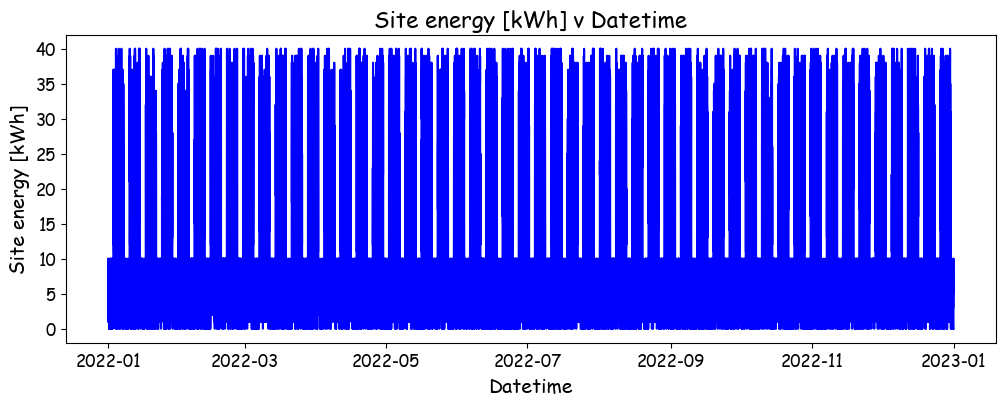

In [937]:
visualize.Visualizer(demand, timeseries=True).plot_plt()

In [891]:
demand.index.dtype

datetime64[ns, UTC]

In [917]:
demand.iloc[:,0]

2022-01-01 00:00:00+00:00     2
2022-01-01 00:30:00+00:00     2
2022-01-01 01:00:00+00:00     8
2022-01-01 01:30:00+00:00     1
2022-01-01 02:00:00+00:00    10
                             ..
2022-12-31 21:30:00+00:00     9
2022-12-31 22:00:00+00:00     2
2022-12-31 22:30:00+00:00    10
2022-12-31 23:00:00+00:00     0
2022-12-31 23:30:00+00:00     0
Freq: 30T, Name: Site energy [kWh], Length: 17520, dtype: int64